Imports:

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

Fetch the data:

In [12]:
california_housing = fetch_california_housing()
California = pd.DataFrame(data=california_housing.data,
                          columns= california_housing.feature_names)
California['MedHouseVal'] = california_housing.target

Show de firts 5 rows of the data:

In [13]:
print(California.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [14]:
California.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

I break down de data into training/test set:

In [35]:
X, y = california_housing.data, california_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

I create the object related to the Linear Regression, and I fit it with the training set:

In [31]:
lr = LinearRegression().fit(X_train, y_train)

With that I can already know the value of each coefficient:

In [40]:
print("lr --> coefficients:", lr.coef_)
print("lr --> intercept:", lr.intercept_)

lr --> coefficients: [ 4.47600069e-01  9.56752596e-03 -1.24755956e-01  7.94471254e-01
 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01 -4.33405135e-01]
lr --> intercept: -37.027827585269414


And with the commando below we can see how good can predict this model:

In [41]:
print("Training set score:{:.2f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.2f}".format(lr.score(X_test, y_test)))

Training set score:0.61
Test set score:0.59


To improve the understanding of the Linear Regression, I will do the same but I will use only one feature. Therefore, I could show a graphic in 2D:

In [56]:
X_new = California[['MedInc']]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, random_state=43)
lr_new = LinearRegression().fit(X_train_new, y_train_new)
#predictions = lr_new.predict(X_test_new)
coef = lr_new.coef_[0]
intercept = lr_new.intercept_
x_values = np.linspace(X_new.min(), X_new.max(), 100)
y_values = intercept + coef * x_values

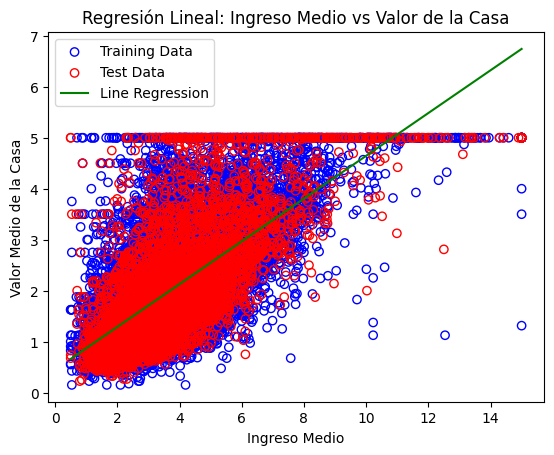

In [61]:
plt.scatter(X_train_new, y_train_new, color = 'blue', facecolors = 'none', label = "Training Data")
plt.scatter(X_test_new, y_test_new, color = "red", facecolors = 'none', label = "Test Data")
#plt.scatter(X_test_new, predictions, color = "green", label = "Line Regression")
plt.plot(x_values, y_values, color = "green", label = "Line Regression")
plt.xlabel("Ingreso Medio")
plt.ylabel("Valor Medio de la Casa")
plt.title("Regresión Lineal: Ingreso Medio vs Valor de la Casa")
plt.legend()
plt.show()